testzeile für git 

In [1]:
import pandas as pd
from glob import glob
import os
import numpy as np

In [2]:
pwd

'/Users/daniellahmann/computational-geoscience-project'

In [4]:
cd /Users/daniellahmann/Desktop/Studium/M.Sc./Computational Geoscience/Data-Analysis-Project/2021-digital-geoscience-seminar-master/project4_anisotropic_ice_Eastgrip/data/cAxes_grains/Daten

/Users/daniellahmann/Desktop/Studium/M.Sc./Computational Geoscience/Data-Analysis-Project/2021-digital-geoscience-seminar-master/project4_anisotropic_ice_Eastgrip/data/cAxes_grains/Daten


Get the path and the files (506 .txt files):

In [5]:
path = os.path.join("/Users/daniellahmann/Desktop/Studium/M.Sc./Computational Geoscience/Data-Analysis-Project/2021-digital-geoscience-seminar-master/project4_anisotropic_ice_Eastgrip/data/cAxes_grains/Daten",'*.txt')
files = glob(path)

# print(path)
# print(files)

In [6]:
# look at the Data-set line structure: Blocks are seperated by \n\n
with open(files[0],'r') as file:   # 'r' -> read, default setting (open(data,mode))
    linedata = file.readlines()

print(linedata) 

['# ++ DATA INFO ++\n', '# instrument = G500701 Bremerhaven\n', '# section folder = /media/pp-analysis/CAXES2018/vertical-sections/EGRIP1546_4_20\n', '# date = Mittwoch, 20 Jun 2018, 6:42 pm\n', '# mineral =  ice\n', '# image width = 3500 pixels\n', '# image height = 5000 pixels\n', '# pixelsize = 20um square\n', '# tile size = 10mm square\n', '# tiles wide = 7\n', '# tiles high = 10\n', '# scanned width = 70mm\n', '# scanned height = 100mm\n', '\n', '# ++ EVALUATION INFO ++\n', '# minimal geometric quality [%] = 50\n', '# minimal retardation quality [%] = 50\n', '# misorientation threshold [degree] = 1\n', '# minimal grain size [pixel] = 500\n', '# tile rotation angle [degree] = 1\n', '\n', '# ++ GENERAL C-AXIS STATISTICS ++\n', '# nr of grains = 782\n', '# mean grain size [pixel] = 16037\n', '# sum vector norm = 0.691046\n', '# regelungsgrad = 38.2092\n', '# concentration parameter = 3.23673\n', '# spherical aperture [degree]= 51.8199\n', '# eigenvalue e1 = 0.00826742\n', '# eigenval

In [7]:
# Look at the data-set structure: 4 blocks (3 Blocks header-data, 4th block actual dataframe+information about the column names)

with open(files[0],'r') as file:
    data = file.read()

print(data) 

# ++ DATA INFO ++
# instrument = G500701 Bremerhaven
# section folder = /media/pp-analysis/CAXES2018/vertical-sections/EGRIP1546_4_20
# date = Mittwoch, 20 Jun 2018, 6:42 pm
# mineral =  ice
# image width = 3500 pixels
# image height = 5000 pixels
# pixelsize = 20um square
# tile size = 10mm square
# tiles wide = 7
# tiles high = 10
# scanned width = 70mm
# scanned height = 100mm

# ++ EVALUATION INFO ++
# minimal geometric quality [%] = 50
# minimal retardation quality [%] = 50
# misorientation threshold [degree] = 1
# minimal grain size [pixel] = 500
# tile rotation angle [degree] = 1

# ++ GENERAL C-AXIS STATISTICS ++
# nr of grains = 782
# mean grain size [pixel] = 16037
# sum vector norm = 0.691046
# regelungsgrad = 38.2092
# concentration parameter = 3.23673
# spherical aperture [degree]= 51.8199
# eigenvalue e1 = 0.00826742
# eigenvalue e2 = 0.424024
# eigenvalue e3 = 0.567708
# woodcock parameter = 0.0741127

# ++ GRAIN PROPERTIES ++
# c1 grain number
# c2 size [pixel]
# c3 cen

In [8]:
blocks = data.split('\n\n')
len(blocks)

4

# Divide the dataset into blocks with regular expression:

In [9]:
import re

def empty_line_split(string):
    
    """ function to split a string on an arbitrary number of empty lines """

    # regular expression is introduced by 'r'
    # here, a minimum of two subsequent linebreaks (\n) are defined as pattern
    regex = r"(?:\n){2,}"
    
    # re.split is a method of the re package to directly split according to the defined pattern
    # analoguously to str.split()
    # strip the string before splitting
    return re.split(regex, string.strip())

In [10]:
blocks_re = empty_line_split(data)

len(blocks_re)

4

In [11]:
print(type(blocks[2]))

<class 'str'>


# Get the eigenvalues out of the headerdata:

In [12]:
split = blocks[2].split(' ')
print(split)

['#', '++', 'GENERAL', 'C-AXIS', 'STATISTICS', '++\n#', 'nr', 'of', 'grains', '=', '782\n#', 'mean', 'grain', 'size', '[pixel]', '=', '16037\n#', 'sum', 'vector', 'norm', '=', '0.691046\n#', 'regelungsgrad', '=', '38.2092\n#', 'concentration', 'parameter', '=', '3.23673\n#', 'spherical', 'aperture', '[degree]=', '51.8199\n#', 'eigenvalue', 'e1', '=', '0.00826742\n#', 'eigenvalue', 'e2', '=', '0.424024\n#', 'eigenvalue', 'e3', '=', '0.567708\n#', 'woodcock', 'parameter', '=', '0.0741127']


In [13]:
e1 = float(split[36].split('\n#')[0]) #abrufen des 37. elements (e1 Daten) und entfernen der line-information (\n#)
e1

0.00826742

In [14]:
e2 = float(split[40].split('\n#')[0])
e2

0.424024

In [15]:
e3 = float(split[44].split('\n#')[0])
e3

0.567708

# Etraction der Mean Grain Size aus Header Block 3

In [16]:
mean_grain_size = int(split[16].split('\n#')[0])

In [17]:
mean_grain_size

16037

# Extraktion des Regelungsgrades und der Anzahl der Grains in dem Sample aus Header block 3:

In [18]:
regelungsgrad = float(split[24].split('\n#')[0])

In [19]:
regelungsgrad


38.2092

In [20]:
nr_of_grains = int(split[10].split('\n#')[0])
nr_of_grains

782

# Anwendung des obigen Codes auf alle Dateien, erstellen einer Tabelle aus den extrahierten Daten und korrelation mit der Tiefe der Probe

In [21]:
df = pd.DataFrame()

In [22]:
df['Datei Name'] = 0
df['e1'] = 0
df['e2'] = 0
df['e3'] = 0
df['mean grain size'] = 0
df['depth'] = 0
df['Regelungsgrad [%]'] = 0
df['Nr der Körner'] = 0

In [23]:
df

Empty DataFrame
Columns: [Datei Name, e1, e2, e3, mean grain size, depth, Regelungsgrad [%], Nr der Körner]
Index: []

In [24]:
e1 = []
e2 = []
e3 = []
mean_grain_size = []
regelungsgrad = []
file_name = []
nr_of_grains = []

for i in range(0, 506):
    with open(files[i],'r') as file:
        current_linedata = file.readlines()
        with open(files[i],'r') as file:
            current_data = file.read()
            current_blocks = current_data.split('\n\n')
            current_blocks_re = empty_line_split(current_data)
            current_split = current_blocks[2].split(' ')
            current_e1 = float(current_split[36].split('\n#')[0])
            current_e2 = float(current_split[40].split('\n#')[0])
            current_e3 = float(current_split[44].split('\n#')[0])
            current_mean_grain_size = int(current_split[16].split('\n#')[0])
            current_regelungsgrad = float(current_split[24].split('\n#')[0])
            current_nr_of_grains = int(current_split[10].split('\n#')[0])
            e1.append(current_e1)
            e2.append(current_e2)
            e3.append(current_e3)
            mean_grain_size.append(current_mean_grain_size)
            regelungsgrad.append(current_regelungsgrad)
            file_name.append(file)
            nr_of_grains.append(current_nr_of_grains)

In [25]:
df['Datei Name'] = file_name
df['e1'] = e1
df['e2'] = e2
df['e3'] = e3
df['mean grain size'] = mean_grain_size
df['depth'] = 0
df['Regelungsgrad [%]'] = regelungsgrad
df['Nr der Körner'] = nr_of_grains

In [26]:
df

Datei Name        e1        e2  \
0    <_io.TextIOWrapper name='/Users/daniellahmann/...  0.008267  0.424024   
1    <_io.TextIOWrapper name='/Users/daniellahmann/...  0.008622  0.373715   
2    <_io.TextIOWrapper name='/Users/daniellahmann/...  0.038053  0.352721   
3    <_io.TextIOWrapper name='/Users/daniellahmann/...  0.014289  0.429511   
4    <_io.TextIOWrapper name='/Users/daniellahmann/...  0.019019  0.300713   
..                                                 ...       ...       ...   
501  <_io.TextIOWrapper name='/Users/daniellahmann/...  0.011390  0.301403   
502  <_io.TextIOWrapper name='/Users/daniellahmann/...  0.010457  0.281491   
503  <_io.TextIOWrapper name='/Users/daniellahmann/...  0.005999  0.468525   
504  <_io.TextIOWrapper name='/Users/daniellahmann/...  0.011254  0.396161   
505  <_io.TextIOWrapper name='/Users/daniellahmann/...  0.028787  0.312673   

           e3  mean grain size  depth  Regelungsgrad [%]  Nr der Körner  
0    0.567708            16037      0            38.2092            782  
1    0.617663            12785      0            43.1866            935  
2    0.609225            12018      0            46.2702           1022  
3    0.556200            17260      0            38.8304            214  
4    0.680268            16546      0            56.3691            624  
..        ...              ...    ...                ...            ...  
501  0.687208             4469      0            57.2207           2615  
502  0.708051             3094      0            60.5807           3585  
503  0.525476             7532      0            32.4876           1220  
504  0.592585             6107      0            42.7421           1895  
505  0.658540            24217      0            54.6086            539  

[506 rows x 8 columns]

# Der Dateiname sieht komische aus. Aufräumen des Dateinamens (extrahieren des eigentlichen File_names) in den nächsten Zeilen:

In [27]:
df['Datei Name'][0]

<_io.TextIOWrapper name='/Users/daniellahmann/Desktop/Studium/M.Sc./Computational Geoscience/Data-Analysis-Project/2021-digital-geoscience-seminar-master/project4_anisotropic_ice_Eastgrip/data/cAxes_grains/Daten/grains_EGRIP1546_4_20.txt' mode='r' encoding='UTF-8'>

In [28]:
str(df['Datei Name'][0]).split('/')[-1].split(' ')[0].split("'")[0] #.split('_')[1][5::]

'grains_EGRIP1546_4_20.txt'

In [29]:
dateinamen = []
for i in range(0,506): # 506 Dateien 
    current_name = str(df['Datei Name'][i]).split('/')[-1].split(' ')[0].split("'")[0]
    dateinamen.append(current_name+'.csv')

In [30]:
df['Datei Name'] = dateinamen

In [31]:
df

Datei Name        e1        e2  \
0                    grains_EGRIP1546_4_20.txt.csv  0.008267  0.424024   
1                    grains_EGRIP2075_6_20.txt.csv  0.008622  0.373715   
2                     grains_EGRIP756_3_20.txt.csv  0.038053  0.352721   
3    grains_EGRIP1208_2_volume_vertical_20.txt.csv  0.014289  0.429511   
4                    grains_EGRIP1406_4_20.txt.csv  0.019019  0.300713   
..                                             ...       ...       ...   
501                  grains_EGRIP2876_2_20.txt.csv  0.011390  0.301403   
502                  grains_EGRIP3086_2_20.txt.csv  0.010457  0.281491   
503                  grains_EGRIP2475_2_20.txt.csv  0.005999  0.468525   
504                  grains_EGRIP2416_3_20.txt.csv  0.011254  0.396161   
505                   grains_EGRIP956_3_20.txt.csv  0.028787  0.312673   

           e3  mean grain size  depth  Regelungsgrad [%]  Nr der Körner  
0    0.567708            16037      0            38.2092            782  
1    0.617663            12785      0            43.1866            935  
2    0.609225            12018      0            46.2702           1022  
3    0.556200            17260      0            38.8304            214  
4    0.680268            16546      0            56.3691            624  
..        ...              ...    ...                ...            ...  
501  0.687208             4469      0            57.2207           2615  
502  0.708051             3094      0            60.5807           3585  
503  0.525476             7532      0            32.4876           1220  
504  0.592585             6107      0            42.7421           1895  
505  0.658540            24217      0            54.6086            539  

[506 rows x 8 columns]

# Zwischenspeichern der Ergebnisse:

In [32]:
df.to_csv(r'/Users/daniellahmann/Desktop/Studium/M.Sc./Computational Geoscience/Data-Analysis-Project/2021-digital-geoscience-seminar-master/project4_anisotropic_ice_Eastgrip/data/cAxes_grains/Header_Daten')

# Abrufen der Daten:

In [33]:
df = pd.read_csv(r'/Users/daniellahmann/Desktop/Studium/M.Sc./Computational Geoscience/Data-Analysis-Project/2021-digital-geoscience-seminar-master/project4_anisotropic_ice_Eastgrip/data/cAxes_grains/Header_Daten')
df = df.drop(columns=['Unnamed: 0'])
df.head()

Datei Name        e1        e2  \
0                  grains_EGRIP1546_4_20.txt.csv  0.008267  0.424024   
1                  grains_EGRIP2075_6_20.txt.csv  0.008622  0.373715   
2                   grains_EGRIP756_3_20.txt.csv  0.038053  0.352721   
3  grains_EGRIP1208_2_volume_vertical_20.txt.csv  0.014289  0.429511   
4                  grains_EGRIP1406_4_20.txt.csv  0.019019  0.300713   

         e3  mean grain size  depth  Regelungsgrad [%]  Nr der Körner  
0  0.567708            16037      0            38.2092            782  
1  0.617663            12785      0            43.1866            935  
2  0.609225            12018      0            46.2702           1022  
3  0.556200            17260      0            38.8304            214  
4  0.680268            16546      0            56.3691            624

# Get the depth out of the file name:

In [34]:
# Dateinamen bei '_' teilen und auf das zweite element zugreifen und ab dem 5.element des strings auf die bagnummer zugreifen
bag = df['Datei Name'][0].split('_')[1][5::]
#Dateinamen bei '_' teilen und auf das dritte element zugreifen um den Cut zu bekommen
cut = df['Datei Name'][0].split('_')[2]



In [35]:
cut

'4'

jetzt für jeden Dateinamen eine Schleife schreiben:


In [36]:
bags = [] # empty list
cuts = []

for i in range(0,506):
    current_bag = int(df['Datei Name'][i].split('_')[1][5::]) 
    current_cut = int(df['Datei Name'][i].split('_')[2])
    bags.append(current_bag)# append all bags to the list 'bags'
    cuts.append(current_cut)# append all cuts to the list 'cuts'

In [37]:
df['bag'] = 0 # create a column in the dataframe for the bag and cut of each file
df['cut'] = 0

In [38]:
df['bag'] = bags #insert the bag data into the dataframe
df['cut'] = cuts # insert the cut data into the dataframe

In [39]:
df.head()

Datei Name        e1        e2  \
0                  grains_EGRIP1546_4_20.txt.csv  0.008267  0.424024   
1                  grains_EGRIP2075_6_20.txt.csv  0.008622  0.373715   
2                   grains_EGRIP756_3_20.txt.csv  0.038053  0.352721   
3  grains_EGRIP1208_2_volume_vertical_20.txt.csv  0.014289  0.429511   
4                  grains_EGRIP1406_4_20.txt.csv  0.019019  0.300713   

         e3  mean grain size  depth  Regelungsgrad [%]  Nr der Körner   bag  \
0  0.567708            16037      0            38.2092            782  1546   
1  0.617663            12785      0            43.1866            935  2075   
2  0.609225            12018      0            46.2702           1022   756   
3  0.556200            17260      0            38.8304            214  1208   
4  0.680268            16546      0            56.3691            624  1406   

   cut  
0    4  
1    6  
2    3  
3    2  
4    4

# Bags und Cuts als Integer konvertierten (pd.to_numeric()), um später mit den Zahlen auch rechnen zu können.

In [40]:
pd.to_numeric(df['bag'])

0      1546
1      2075
2       756
3      1208
4      1406
       ... 
501    2876
502    3086
503    2475
504    2416
505     956
Name: bag, Length: 506, dtype: int64

In [41]:
pd.to_numeric(df['cut'])

0      4
1      6
2      3
3      2
4      4
      ..
501    2
502    2
503    2
504    3
505    3
Name: cut, Length: 506, dtype: int64

In [42]:
df['depth'] = df['bag']*0.55+((df['cut']-1)*0.09) #Formel für die Berechnung siehe readme file von Frau Kerch

In [43]:
df.sort_values('depth')

Datei Name        e1        e2  \
305  grains_EGRIP203_1_volume_vertical_20.txt.csv  0.206199  0.278516   
344  grains_EGRIP203_2_volume_vertical_20.txt.csv  0.212429  0.256304   
429  grains_EGRIP203_3_volume_vertical_20.txt.csv  0.210208  0.284137   
303  grains_EGRIP599_1_volume_vertical_20.txt.csv  0.094259  0.311389   
343  grains_EGRIP599_2_volume_vertical_20.txt.csv  0.105253  0.357305   
..                                            ...       ...       ...   
464                 grains_EGRIP3117_2_20.txt.csv  0.014577  0.355548   
219                 grains_EGRIP3117_3_20.txt.csv  0.012982  0.330348   
359                 grains_EGRIP3117_4_20.txt.csv  0.014972  0.319412   
69                  grains_EGRIP3117_5_20.txt.csv  0.013167  0.330290   
279                 grains_EGRIP3117_6_20.txt.csv  0.014228  0.341108   

           e3  mean grain size    depth  Regelungsgrad [%]  Nr der Körner  \
305  0.515285             9846   111.65            32.2143            814   
344  0.531267             9539   111.74            31.7086            403   
429  0.505654             9679   111.83            29.6032           1320   
303  0.594352            21036   329.45            45.8168            531   
343  0.537442            21391   329.54            23.5343            431   
..        ...              ...      ...                ...            ...   
464  0.629875             4933  1714.44            48.1005           2308   
219  0.656670             5057  1714.53            52.2342           2200   
359  0.665616             4674  1714.62            54.1115           2530   
69   0.656543             4107  1714.71            52.3236           2340   
279  0.644664             5154  1714.80            49.4824           2177   

      bag  cut  
305   203    1  
344   203    2  
429   203    3  
303   599    1  
343   599    2  
..    ...  ...  
464  3117    2  
219  3117    3  
359  3117    4  
69   3117    5  
279  3117    6  

[506 rows x 10 columns]

# Zwischenspeichern der Ergebnisse:

In [44]:
# df.drop(columns=['Unnamed: 0'], inplace=True)

df.to_csv(r'/Users/daniellahmann/Desktop/Studium/M.Sc./Computational Geoscience/Data-Analysis-Project/2021-digital-geoscience-seminar-master/project4_anisotropic_ice_Eastgrip/data/cAxes_grains/Header_Daten_Tiefe.csv')

In [45]:
df

Datei Name        e1        e2  \
0                    grains_EGRIP1546_4_20.txt.csv  0.008267  0.424024   
1                    grains_EGRIP2075_6_20.txt.csv  0.008622  0.373715   
2                     grains_EGRIP756_3_20.txt.csv  0.038053  0.352721   
3    grains_EGRIP1208_2_volume_vertical_20.txt.csv  0.014289  0.429511   
4                    grains_EGRIP1406_4_20.txt.csv  0.019019  0.300713   
..                                             ...       ...       ...   
501                  grains_EGRIP2876_2_20.txt.csv  0.011390  0.301403   
502                  grains_EGRIP3086_2_20.txt.csv  0.010457  0.281491   
503                  grains_EGRIP2475_2_20.txt.csv  0.005999  0.468525   
504                  grains_EGRIP2416_3_20.txt.csv  0.011254  0.396161   
505                   grains_EGRIP956_3_20.txt.csv  0.028787  0.312673   

           e3  mean grain size    depth  Regelungsgrad [%]  Nr der Körner  \
0    0.567708            16037   850.57            38.2092            782   
1    0.617663            12785  1141.70            43.1866            935   
2    0.609225            12018   415.98            46.2702           1022   
3    0.556200            17260   664.49            38.8304            214   
4    0.680268            16546   773.57            56.3691            624   
..        ...              ...      ...                ...            ...   
501  0.687208             4469  1581.89            57.2207           2615   
502  0.708051             3094  1697.39            60.5807           3585   
503  0.525476             7532  1361.34            32.4876           1220   
504  0.592585             6107  1328.98            42.7421           1895   
505  0.658540            24217   525.98            54.6086            539   

      bag  cut  
0    1546    4  
1    2075    6  
2     756    3  
3    1208    2  
4    1406    4  
..    ...  ...  
501  2876    2  
502  3086    2  
503  2475    2  
504  2416    3  
505   956    3  

[506 rows x 10 columns]

# Importieren der Daten und Darstellung der Plots (eigenvalue vs. Tiefe, Grainssize vs. Tiefe)

In [46]:
df = pd.read_csv(r'/Users/daniellahmann/Desktop/Studium/M.Sc./Computational Geoscience/Data-Analysis-Project/2021-digital-geoscience-seminar-master/project4_anisotropic_ice_Eastgrip/data/cAxes_grains/Header_Daten_Tiefe.csv')
df.head()

Unnamed: 0                                     Datei Name        e1  \
0           0                  grains_EGRIP1546_4_20.txt.csv  0.008267   
1           1                  grains_EGRIP2075_6_20.txt.csv  0.008622   
2           2                   grains_EGRIP756_3_20.txt.csv  0.038053   
3           3  grains_EGRIP1208_2_volume_vertical_20.txt.csv  0.014289   
4           4                  grains_EGRIP1406_4_20.txt.csv  0.019019   

         e2        e3  mean grain size    depth  Regelungsgrad [%]  \
0  0.424024  0.567708            16037   850.57            38.2092   
1  0.373715  0.617663            12785  1141.70            43.1866   
2  0.352721  0.609225            12018   415.98            46.2702   
3  0.429511  0.556200            17260   664.49            38.8304   
4  0.300713  0.680268            16546   773.57            56.3691   

   Nr der Körner   bag  cut  
0            782  1546    4  
1            935  2075    6  
2           1022   756    3  
3            214  1208    2  
4            624  1406    4

In [47]:
df = df.drop(columns=['Unnamed: 0'])

In [48]:
df = df.sort_values('depth') # nach der Tiefe aufsteigend sortierte Daten
df.head()

Datei Name        e1        e2  \
305  grains_EGRIP203_1_volume_vertical_20.txt.csv  0.206199  0.278516   
344  grains_EGRIP203_2_volume_vertical_20.txt.csv  0.212429  0.256304   
429  grains_EGRIP203_3_volume_vertical_20.txt.csv  0.210208  0.284137   
303  grains_EGRIP599_1_volume_vertical_20.txt.csv  0.094259  0.311389   
343  grains_EGRIP599_2_volume_vertical_20.txt.csv  0.105253  0.357305   

           e3  mean grain size   depth  Regelungsgrad [%]  Nr der Körner  bag  \
305  0.515285             9846  111.65            32.2143            814  203   
344  0.531267             9539  111.74            31.7086            403  203   
429  0.505654             9679  111.83            29.6032           1320  203   
303  0.594352            21036  329.45            45.8168            531  599   
343  0.537442            21391  329.54            23.5343            431  599   

     cut  
305    1  
344    2  
429    3  
303    1  
343    2

In [49]:
import matplotlib.pyplot as plt
from scipy import stats

# Korngröße in Abhängigkeit der Tiefe

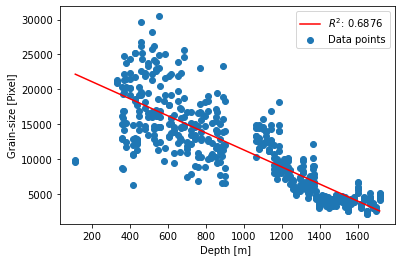

In [62]:
res = stats.linregress(df['depth'], df['mean grain size'])
fig = plt.figure(facecolor=(1, 1, 1))
plt.scatter(df['depth'], df['mean grain size'], label='Data points')
plt.plot(df['depth'], res.intercept + res.slope*df['depth'], 'r-', label=f"$R^2$: {res.rvalue**2:.4f}")
plt.ylabel('Grain-size [Pixel]')
plt.xlabel('Depth [m] ')
plt.legend()


plt.savefig('Grainsize.png')

In [65]:
r = res.rvalue**2

# Eigenvalue e3 in Abhängigkeit der Tiefe:

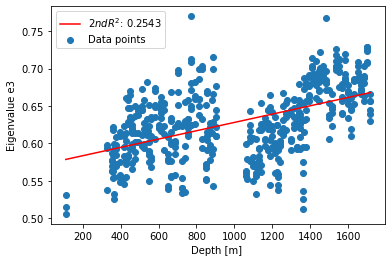

In [60]:
res = stats.linregress(df['depth'] , df['e3'])

plt.scatter(df['depth'], df['e3'], label='Data points')

plt.plot(df['depth'], res.intercept + res.slope*df['depth'], 'r-', label=f"$2nd R^2$: {res.rvalue**2:.4f}")
plt.ylabel('Eigenvalue e3')
plt.xlabel('Depth [m] ')
plt.legend()


plt.savefig('E3.png')

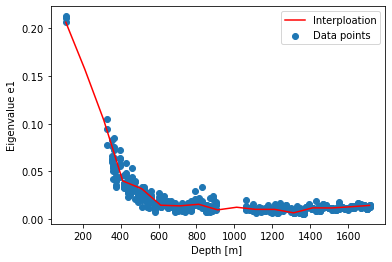

In [59]:
from scipy import interpolate

x = df.depth
y = df.e1

f = interpolate.interp1d(x, y, kind='linear')

xnew = np.arange(111.65, 1759.35, 100) # got the stat, end points with df.depth.min(), df.depth.max()

ynew = f(xnew)   # use interpolation function returned by `interp1d`

plt.scatter(df['depth'], df['e1'], label='Data points')

plt.plot(xnew, ynew, 'r-', label='Interploation')
plt.ylabel('Eigenvalue e1')
plt.xlabel('Depth [m] ')
plt.legend()


plt.savefig('e1.png')

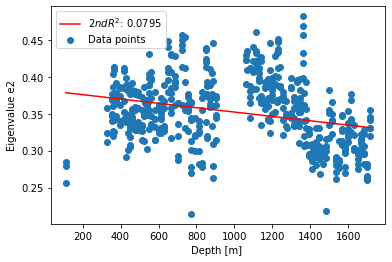

In [57]:
res = stats.linregress(df['depth'] , df['e2'])

plt.scatter(df['depth'], df['e2'], label='Data points')

plt.plot(df['depth'], res.intercept + res.slope*df['depth'], 'r-', label=f"$2nd R^2$: {res.rvalue**2:.4f}")
plt.ylabel('Eigenvalue e2')
plt.xlabel('Depth [m] ')
plt.legend()

plt.savefig('e2.png')

In [54]:
pwd

'/Users/daniellahmann/Desktop/Studium/M.Sc./Computational Geoscience/Data-Analysis-Project/2021-digital-geoscience-seminar-master/project4_anisotropic_ice_Eastgrip/data/cAxes_grains/Daten'